Collaborative coding using GitHub (TEST)
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023

In [2]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')

In [8]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

In [3]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.dropna(inplace = True)

df['status'] = df['status'].astype('int')
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Q1.1 (True) Average vocal fundamental frequency (MDVP:Fo(Hz)) and the Maximum vocal fundamental frequency (MDVP: Fhi(Hz)) are highly correlated.

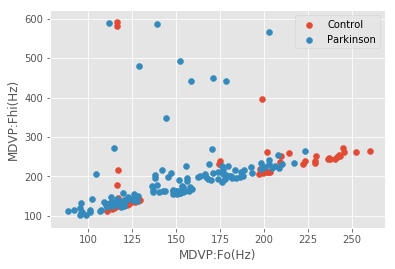

In [15]:
import matplotlib.pyplot as plt

# Convert 'status' column to string type if needed
df['status'] = df['status'].astype(str)

# Scatter plot for 'control' group
plt.scatter(df[df['status'] == '0']['MDVP:Fo(Hz)'], df[df['status'] == '0']['MDVP:Fhi(Hz)'], cmap='Spectral', label='Control')

# Scatter plot for 'parkinson' group
plt.scatter(df[df['status'] == '1']['MDVP:Fo(Hz)'], df[df['status'] == '1']['MDVP:Fhi(Hz)'], cmap='Spectral', label='Parkinson')

# Set labels for axes
plt.ylabel('MDVP:Fhi(Hz)')
plt.xlabel('MDVP:Fo(Hz)')

# Show legend
plt.legend()

# Show the plot
plt.show()




Q1.2 (TRUE) When analyzing the Correlation dimension (D2) vs. Sread1 (a nonlinear measure of fundamental frequency variation) on a scatter plot, it is possible to diffrenciate between Parkinsons subjects healthy controls (except some outliers)

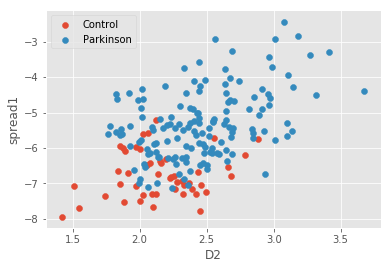

In [16]:
# Scatter plot for 'control' group
plt.scatter(df[df.status == '0']['D2'], df[df.status == '0']['spread1'], cmap='Spectral', label='Control')

# Scatter plot for 'parkinson' group
plt.scatter(df[df.status == '1']['D2'], df[df.status == '1']['spread1'], cmap='Spectral', label='Parkinson')

# Set labels for axes
plt.ylabel('spread1')
plt.xlabel('D2')

# Show legend
plt.legend()

# Show the plot
plt.show()

Q.3 (FALSE) When plotting Average vocal fundamental frequency (MDVP:Fo(Hz)) against Recurrence period density entropy measyre (RPDE) on scatter plot, points group together to form highly differentiable clusters of Parkinsons and healthy subjects

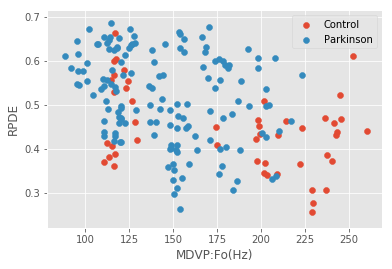

In [17]:
# Scatter plot for 'control' group
plt.scatter(df[df.status == '0']['MDVP:Fo(Hz)'], df[df.status == '0']['RPDE'], cmap='Spectral', label='Control')

# Scatter plot for 'parkinson' group
plt.scatter(df[df.status == '1']['MDVP:Fo(Hz)'], df[df.status == '1']['RPDE'], cmap='Spectral', label='Parkinson')

# Set labels for axes
plt.ylabel('RPDE')
plt.xlabel('MDVP:Fo(Hz)')

# Show legend
plt.legend()

# Show the plot
plt.show()


Q1.4 (FALSE) The mean of the MDVP relative amplitude perturbation (MDVP: RAP) is 0.0028 and 0.0019 in Parkinsons patients and healthy subjects respectively.

In [50]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Q1.5 (FALSE) The 75% percentile of the Harmonics-to-noise-ratio (HNR) for subject S26 is 24.13

In [18]:


df['subjectID'] = aux['subject_id']

# Filter the DataFrame to include only rows where 'subjectID' is 'S26'
var = df[df['subjectID'] == 'S26']

# Calculate the 75th percentile of the 'HNR' column
percentile_75 = var['HNR'].quantile(0.75)

# Print the result
print("The 75th percentile of HNR for subject S26 is:", percentile_75)


NameError: name 'aux' is not defined

In [43]:
df.columns


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Q.2 Apply a KNN classifier for discriminating between healthy subjecg and patients based on a subset comprising only the variables MDVP: F0 (Hz), D2, Spread1, Spread2, and PPE. What is the obtained Accuracy for 5 neighbors?

In [22]:

from sklearn.neighbors import KNeighborsClassifier

subset_variables = ['MDVP:Fo(Hz)', 'D2', 'spread1', 'spread2', 'PPE']
X = df[subset_variables]
y = df['status']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

numericAcc = knn.score(X, y)
print ('The accuracy of the model is ' + str(Acc))


The accuracy of the model is 0.9333333333333333


Q.3. Min-max is a way of normalizing the original data by scaling each variable X in the range (0.1) as: ... Apply min-max normalization on a subset comprising the variables MDVP:F0 (Hz), D2, spread1, spread2 and PPE. Use this normalilzed subset to discriminate between patients and healthy subjects using a 5-Neighbor KNN Classifier. What is the accuracy obtained?

In [23]:
def minmax(subdata):
    numeric_df = subdata._get_numeric_data()
    numcols = list(numeric_df.columns)
    norm_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())
    return norm_df


In [24]:
Xminmax = minmax(df[['MDVP:Fo(Hz)', 'D2', 'spread1', 'spread2', 'PPE']])
y=df['status']
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xminmax,y)
print ('The accuracy of the model is '+ str(knn.score(Xminmax,y)))

The accuracy of the model is 0.9487179487179487


In [15]:
Xav= newdf.drop(['status','name'],axis = 1)
y= newdf['status']
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(Xav,y)
print ('The accuracy of the model is '+ str(knn.score(Xav,y)))

NameError: name 'newdf' is not defined

In [14]:
# Separate features (Xav) and target variable (y)
Xav = df.drop(['status', 'name'], axis=1)
y = df['status']

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the entire dataset
knn.fit(Xav, y)

# Evaluate the accuracy on the same dataset
accuracy = knn.score(Xav, y)
print('The accuracy of the model is ' + str(accuracy))


The accuracy of the model is 0.9282051282051282


Look for correlations between the variables related to the fundamental frequency ('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)’ and MDVP:Flo(Hz) in the original dataframe) using the scat_plot function. Use the scat_plot function created by your collaborators for this purpose. If the variables are correlated keep only a subset that are representative (one or some of them). Discard the others by removing them from the dataframe. Do the same for the variables related to Jitter ('MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP') and Shimmer ( 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',). Name this dataframe as cleaned_df and work with it from here on.

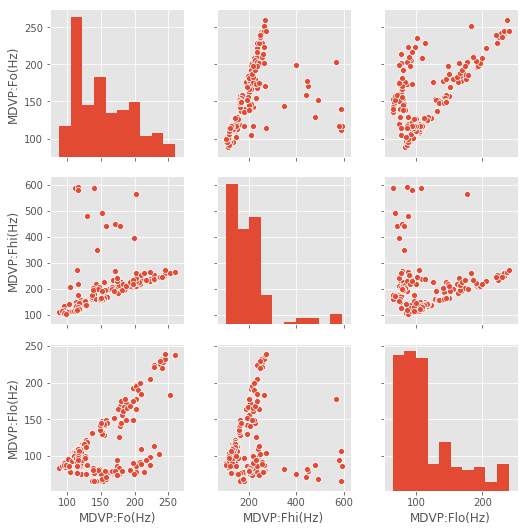

In [17]:
sns.pairplot(df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']])
plt.show()


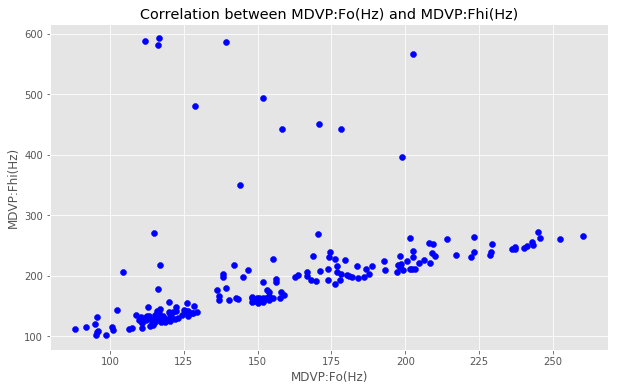

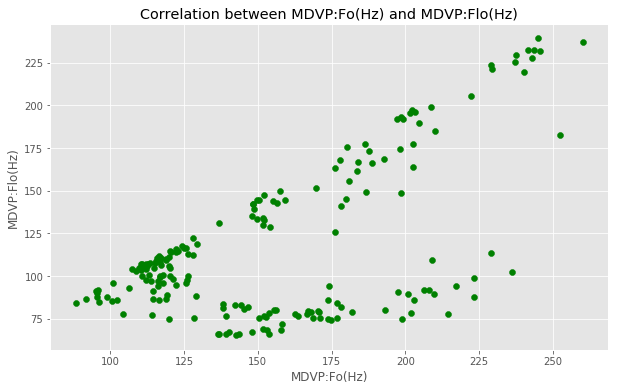

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['MDVP:Fo(Hz)'], df['MDVP:Fhi(Hz)'], color='blue')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('Correlation between MDVP:Fo(Hz) and MDVP:Fhi(Hz)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['MDVP:Fo(Hz)'], df['MDVP:Flo(Hz)'], color='green')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Flo(Hz)')
plt.title('Correlation between MDVP:Fo(Hz) and MDVP:Flo(Hz)')
plt.show()

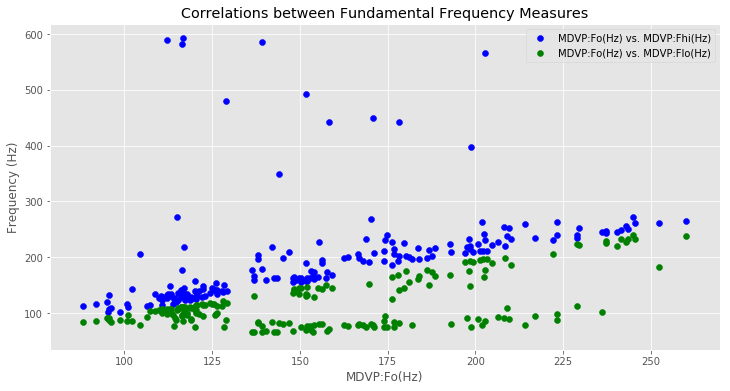

In [19]:
plt.figure(figsize=(12, 6))

plt.scatter(df['MDVP:Fo(Hz)'], df['MDVP:Fhi(Hz)'], c='blue', label='MDVP:Fo(Hz) vs. MDVP:Fhi(Hz)')
plt.scatter(df['MDVP:Fo(Hz)'], df['MDVP:Flo(Hz)'], c='green', label='MDVP:Fo(Hz) vs. MDVP:Flo(Hz)')

plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency (Hz)')
plt.title('Correlations between Fundamental Frequency Measures')
plt.legend()
plt.show()

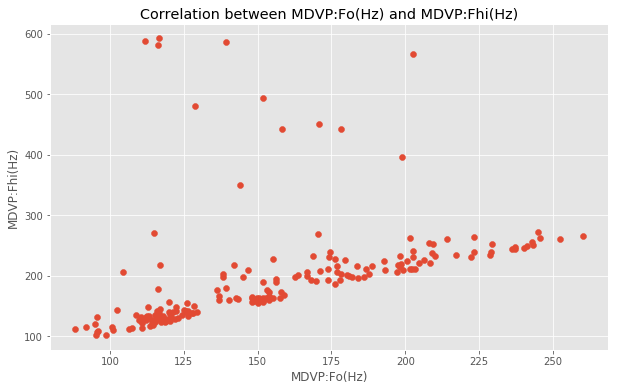

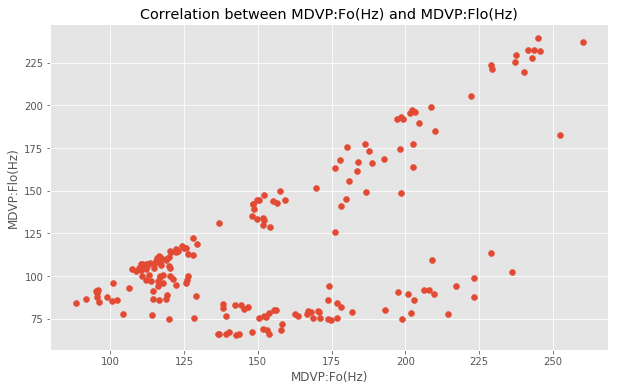

Correlation between MDVP:Fo(Hz) and MDVP:Fhi(Hz): 0.4009846762460626
Correlation between MDVP:Fo(Hz) and MDVP:Flo(Hz): 0.5965455187557578
               name  MDVP:Fo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0    phon_R01_S01_1      119.992         0.00784           0.00007   0.00370   
1    phon_R01_S01_2      122.400         0.00968           0.00008   0.00465   
2    phon_R01_S01_3      116.682         0.01050           0.00009   0.00544   
3    phon_R01_S01_4      116.676         0.00997           0.00009   0.00502   
4    phon_R01_S01_5      116.014         0.01284           0.00011   0.00655   
5    phon_R01_S01_6      120.552         0.00968           0.00008   0.00463   
6    phon_R01_S02_1      120.267         0.00333           0.00003   0.00155   
7    phon_R01_S02_2      107.332         0.00290           0.00003   0.00144   
8    phon_R01_S02_3       95.730         0.00551           0.00006   0.00293   
9    phon_R01_S02_4       95.056         0.00532           0.0

In [23]:
def scat_plot(df, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.show()

# Plot the correlations between the variables
scat_plot(df, "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "Correlation between MDVP:Fo(Hz) and MDVP:Fhi(Hz)")
scat_plot(df, "MDVP:Fo(Hz)", "MDVP:Flo(Hz)", "Correlation between MDVP:Fo(Hz) and MDVP:Flo(Hz)")

# Calculate the correlation coefficients
correlation_1 = df["MDVP:Fo(Hz)"].corr(df["MDVP:Fhi(Hz)"])
correlation_2 = df["MDVP:Fo(Hz)"].corr(df["MDVP:Flo(Hz)"])

# Print the correlation coefficients
print("Correlation between MDVP:Fo(Hz) and MDVP:Fhi(Hz):", correlation_1)
print("Correlation between MDVP:Fo(Hz) and MDVP:Flo(Hz):", correlation_2)

# Remove the correlated variables
df.drop(["MDVP:Fhi(Hz)", "MDVP:Flo(Hz)"], axis=1, inplace=True)

# Print the dataframe
print(df)
